<a href="https://colab.research.google.com/github/Itallo0708/Computational-Mathematics/blob/main/notebooks/Atividade_2_2_Linear_regression_p_value_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão A)
Iremos começar importando bibliotecas necessárias para essa questão.

In [14]:
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles
import numpy as np
from scipy import stats

# Funções ultilizadas na questão

In [15]:
def calculos_regress(x, y):
  slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
  # Covariância
  matriz_cov = np.cov(x, y)
  covariancia = matriz_cov[0][1]

  return slope, intercept, r_value, p_value, std_err, covariancia

# Função para o plot dos gráficos
def plotar_graficos(x, y, estatisticas, titulo, cor):
  slope, intercept, r_value, p_value, std_err, covariancia = estatisticas

  # Pontos
  plt.scatter(x, y, color = cor, s= 150, edgecolor='black', alpha= 0.9, label ='Dados')

  # Reta
  linha_x = np.array([min(x), max(x)])
  linha_y = (slope * linha_x) + intercept
  plt.plot(linha_x, linha_y, color='red', linestyle = '--', linewidth =2, label='Regressão')

  # Caixa de texto
  info = f'P-value: {p_value:.4e}\nCovariancia: {covariancia:.2f}'
  plt.text(0.05, 0.95, info, transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

  # Plot
  plt.title(titulo)
  plt.xlabel("Gene X")
  plt.ylabel("Gene Y")
  plt.legend()
  plt.grid(True, linestyle=':', alpha=0.6)
  plt.show()

### Gráfico 1

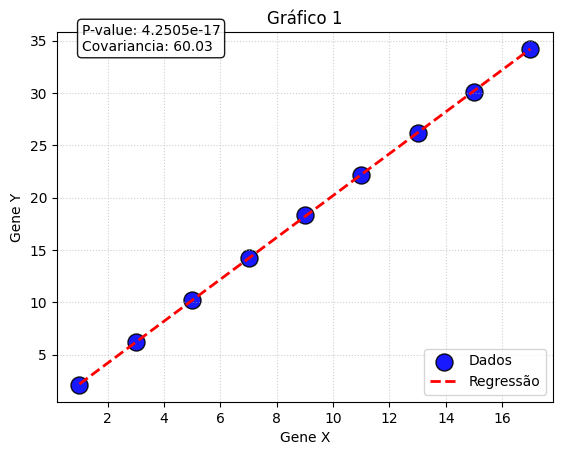

In [16]:
# Definindo o conjunto dos pontos
x1 = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17])

y1 = np.array([2.1, 6.2, 10.2, 14.2, 18.3, 22.2, 26.2, 30.1, 34.2])

# Executando exemplo
estatisticas = calculos_regress(x1, y1)
plotar_graficos(x1, y1, estatisticas, 'Gráfico 1', 'blue')


### Gráfico 2

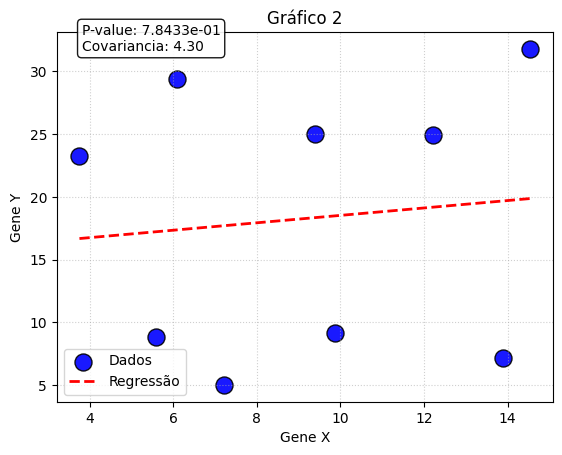

In [17]:
x2 = np.random.uniform(low=np.min(x1), high=np.max(x1), size=9)
y2 = np.random.uniform(low=np.min(y1), high=np.max(y1), size=9)

# Executando exemplo
estatisticas = calculos_regress(x2, y2)
plotar_graficos(x2, y2, estatisticas, 'Gráfico 2', 'blue')

# Questão B)


Importando o arquivo csv com os dados amostrais.

In [18]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Descrição do Dataset

O dataset contém dados sintéticos sobre hábitos de sono e estilo de vida.


In [19]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/matematica_computacional/Sleep_health_and_lifestyle_dataset.csv")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Nesta análise, será utilizada a variável Sleep Duration (hours) para calcular estatísticas descritivas e construir intervalos de confiança de 90%, 95% e 99% para a média de horas de sono, permitindo estimar esse parâmetro populacional.

In [20]:
df_sleep_duration = df["Sleep Duration"]
df_sleep_duration.head(10)

,Sleep Duration
0,6.1
1,6.2
2,6.2
3,5.9
4,5.9
5,5.9
6,6.3
7,7.8
8,7.8
9,7.8


### Função para os calculos
Essa função realiza os calculos estatisticos necessários, tais como : média, desvio padrão, erro padrão e os limites do intervalo de confiança

In [22]:
def calcular_intervalo(dados, nivel_confianca):
  dados_tratados = dados.dropna()
  n = len(dados_tratados)
  media = np.mean(dados_tratados)
  desvio_padrao = np.std(dados_tratados, ddof=1)
  erro_padrao = desvio_padrao / np.sqrt(n)

  # intervalo
  limite_inferior, limite_superior = stats.t.interval(nivel_confianca, df=n-1, loc=media, scale=erro_padrao)

  return {
      "media": media,
      "erro_padrao": erro_padrao,
      "limite_inferior": limite_inferior,
      "limite_superior": limite_superior,
      "nivel": nivel_confianca,
      "n": n
  }

### Função para Exibir os Gráficos
Função auxiliar para plotar a distribuição da média e o intervalo de confiança: